In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import math

In [17]:
%config IPCompleter.greedy=True

In [18]:
df = pd.read_csv('~/MasterThesis/Data/iris.csv')

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [20]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])

**Principal Component Analysis for Dimentionality Reduction**

In [21]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
df_3d=pca.transform(df)

In [23]:
df_3d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

In [24]:
sample = df_3d

**Elbow Implimentation with Root Mean Squared Standered Deviation**

In [25]:
RMSSTD={}
K = range(1,10)
for k in K :
    RMSSTD[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample[labels==i],columns=["PC1","PC2","PC3"])
        print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        print("Cluster Mean= "+str(cluster_mean))
        
        for index,row in cluster_datapoints.iterrows():
            a=(row["PC1"]-cluster_mean["PC1"])**2
            b=(row["PC2"]-cluster_mean["PC2"])**2
            c=(row["PC3"]-cluster_mean["PC3"])**2
            err=math.sqrt(a+b+c)
            RMSSTD[k]=RMSSTD[k]+err
    #Calculate the mean error for entire dataset
    RMSSTD[k]=RMSSTD[k]/len(sample)
    print("RMSSTD = "+str(RMSSTD))

        PC1       PC2       PC3
0 -2.865507  0.302780  0.048490
1 -2.893213 -0.176987 -0.168798
2 -3.055749 -0.168006  0.056542
3 -2.921249 -0.325027  0.009800
4 -2.906751  0.302333  0.153720
Cluster Mean= PC1    2.960595e-17
PC2   -4.836872e-16
PC3   -1.310063e-16
dtype: float64
RMSSTD = {1: 2.0594781802737896}
        PC1       PC2       PC3
0  1.196484  0.789637 -0.475876
1  0.869588  0.389422 -0.138990
2  1.364693  0.625797 -0.480233
3  0.171608 -0.782972 -0.302215
4  1.014358  0.174763 -0.442421
Cluster Mean= PC1    1.435027
PC2   -0.079016
PC3   -0.025351
dtype: float64
        PC1       PC2       PC3
0 -2.865507  0.302780  0.048490
1 -2.893213 -0.176987 -0.168798
2 -3.055749 -0.168006  0.056542
3 -2.921249 -0.325027  0.009800
4 -2.906751  0.302333  0.153720
Cluster Mean= PC1   -2.785641
PC2    0.153385
PC3    0.049211
dtype: float64
RMSSTD = {1: 2.0594781802737896, 2: 0.9083961598789707}
        PC1       PC2       PC3
0 -2.865507  0.302780  0.048490
1 -2.893213 -0.176987 -0.168

        PC1       PC2       PC3
0 -2.893213 -0.176987 -0.168798
1 -3.055749 -0.168006  0.056542
2 -2.921249 -0.325027  0.009800
3 -2.991065 -0.116740  0.250386
4 -2.811053  0.155636  0.016627
Cluster Mean= PC1   -2.948263
PC2   -0.207764
PC3   -0.016738
dtype: float64
        PC1       PC2       PC3
0  1.196484  0.789637 -0.475876
1  0.869588  0.389422 -0.138990
2  1.364693  0.625797 -0.480233
3  1.014358  0.174763 -0.442421
4  1.022144  0.362402 -0.021133
Cluster Mean= PC1    0.980252
PC2    0.176445
PC3   -0.337994
dtype: float64
        PC1       PC2       PC3
0  2.799601  0.346962 -0.044368
1  3.527018  0.622118 -0.369142
2  3.093324  0.397222 -0.380396
3  3.080988  0.779250  0.417932
4  3.611582  1.221562  0.103096
Cluster Mean= PC1    3.218469
PC2    0.654597
PC3   -0.214158
dtype: float64
        PC1       PC2       PC3
0  0.171608 -0.782972 -0.302215
1  0.599546 -0.352586 -0.159324
2 -0.006291 -0.712848  0.131849
3  0.478009 -0.062060  0.004052
4  0.245402 -0.486632 -0.711095
C

**Ploting Elbow**

In [26]:
SSE_array=[]
slope=[]
for key,value in RMSSTD.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[2.0594781802737896, 0.9083961598789707, 0.6251694149368586, 0.5612239005518572, 0.48272781880877585, 0.43625797145036016, 0.3947834980864506, 0.36571892139225104, 0.3519477630495998]


[[2, -1.1510820203948189],
 [3, -0.2832267449421121],
 [4, -0.0639455143850014],
 [5, -0.07849608174308137],
 [6, -0.046469847358415695],
 [7, -0.04147447336390958],
 [8, -0.02906457669419954],
 [9, -0.013771158342651246]]

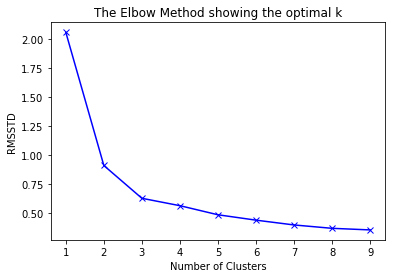

In [27]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSSTD')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [28]:
slope

[[2, -1.1510820203948189],
 [3, -0.2832267449421121],
 [4, -0.0639455143850014],
 [5, -0.07849608174308137],
 [6, -0.046469847358415695],
 [7, -0.04147447336390958],
 [8, -0.02906457669419954],
 [9, -0.013771158342651246]]

In [29]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3
